<h2>Assignment 1 - Linear Regression on Boston Housing Data</h2>

In [0]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [0]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)
# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

<h4>Use scikit-learn library in the following cell</h4>

In [0]:
# Task 1-1: use linear regression in sklearn
  reg = linear_model.LinearRegression()
  
# Task 1-2: show intercept and coefficents
  reg.fit(train_data,train_target)
  print("Coefficients: ", reg.coef_)
  print("Intercept: ", reg.intercept_)
  

# Task 1-3: show errors on training dataset and testing dataset
  train_pred = reg.predict(test_data)
  print("MSE: " , mean_squared_error(train_pred,test_target))
  

Coefficients:  [[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]
Intercept:  [30.24675099]
MSE:  24.291119474973616


<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

In [0]:

# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights
def myNormalEqualFun(X,y):
    m = y.size
    x_bias = np.ones((m,1))
    
    #reshape nd array to (404,13)
    X = np.reshape(X,(X.shape))
    X = np.append(x_bias,X,axis = 1)
    xT = np.transpose(X)
    xT_dot = xT.dot(X)
    
    #Transpose X and inverse it, then dot it with the transposed array with the training labels
    theta = np.linalg.inv(xT_dot).dot(xT.dot(y))
    return theta #theta = (x^T dot X)^-1 dot (X^T dot Y)
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):    
    return X.dot(w) + intercept

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)


# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data,train_target)

# Task 2-3: show intercept and coefficents
intercept = w[0]
print("Intercept: " , intercept)
w = np.delete(w,0)
print("Coefficients: " , w)

train_pred = myPredictFun(test_data,w)


# Task 2-4: show errors on training dataset and testing dataset
MSEtotal = 0
for i in range(test_target.size):
    MSEtotal += np.square(train_pred.item(i) - test_target.item(i))    
MSE = MSEtotal/(test_target.size)          
print("MSE: ", MSE/2)


Intercept:  [30.24675099]
Coefficients:  [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
MSE:  12.145559737488307


<h4>Use numerical solution (basic gradient descent) to perform linear regression in the following cell</h4>

Intercept:  22.79555333435062
Coefficients:  [-0.86782689  0.3950153  -0.04297357  0.76200827 -1.57797921  3.34069793
 -0.18501533 -2.58505842  1.19003465 -0.72903023 -1.94138034  1.14529851
 -3.53809518]
MSE:  12.712268815516387


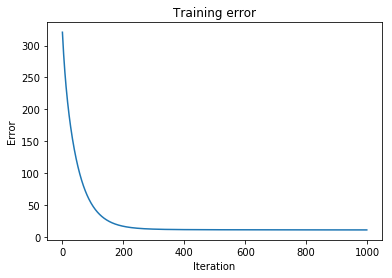

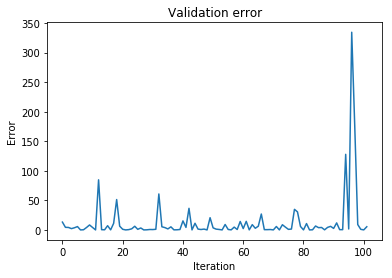

In [0]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: the final Weights
#         the loss history along iterations
def myGradientDescentFun(X,y,learning_rate,numItrs):
  m = y.size
  lstCost = []
  
  #Array of (14,) with random values from 0 to 1
  theta = np.random.rand(X.shape[1])
  for i in range(numItrs):
    pred = np.dot(X,theta) #Make a prediction
    error = pred - y #Calculate error
    cost = 1/(2*m)*np.dot(np.transpose(error), error) #Calculate training cost
    lstCost.append(cost)  #Put error in the cost array
    
    theta = theta - (learning_rate * (1/m) * np.dot(np.transpose(X), error)) #Update theta
   
  
  return theta,lstCost

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return X.dot(w) + intercept

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)


# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
m,costs = myGradientDescentFun(train_data_intercept,train_target.flatten(),0.01,1000)

# Task 3-3: show intercept and coefficents


intercept = m[0]
print("Intercept: " , intercept)
m = np.delete(m,0)
print("Coefficients: " , m)

train_pred = myPredictFun(test_data,m)


# Task 3-4: show errors on training dataset and testing dataset
MSEtotal = 0
lstCostTest = []
for i in range(test_target.size):
    cost = np.square(train_pred.item(i) - test_target.item(i))
    MSEtotal +=  cost
    lstCostTest.append(cost/2)
    
    
MSE = MSEtotal/(test_target.size)          
print("MSE: ", MSE/2)


# Task 3-5: plot learning curves showing training errors and testing errors along iterations
plt.plot(costs)
plt.title('Training error')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

plt.plot(lstCostTest)
plt.title('Validation error')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

<h4>Use numerical solution (stochastic gradient descent) to perform linear regression in the following cell</h4>

Intercept:  [11.36176637]
Coefficients:  [11.25019668 -0.87002645  0.32409531 -0.09225815  0.72925528 -1.46019536
  3.37130536 -0.19238331 -2.49850828  1.27352104 -0.88880783 -2.0556159
  1.1670164  -3.76554903]
MSE:  12.712268815516387


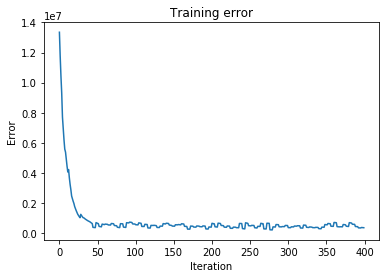

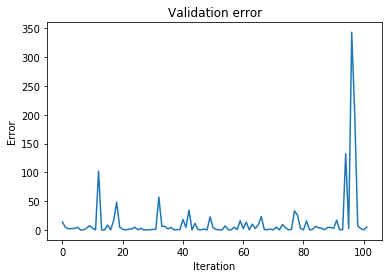

In [0]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 4-1: Implement a function performing gradient descent
# Inputs: Training data, training label, learning rate, number of epoches, batch size
# Output: the final Weights
#         the loss history along batches
def myGradientDescentFun(X,y,learning_rate,epoches, batchsize):
    theta = np.random.rand(15,1) #Make theta a size (15,1) array of random vars from 0 to 1
    m = y.size
    lstCost = []
    for i in range (epoches):
      cost = 0.0
      indexes = np.random.permutation(m) #Shuffle
      
      X = X[indexes]
      y = y[indexes]
      for j in range (0,m,batchsize):
        xi = X[i:i+batchsize] #X batch
        xi = np.c_[np.ones(len(xi)),xi] #Add ones ot X batch
        
        yi = y[i:i+batchsize] #Y batch
       
        prediction = np.dot(xi,theta) #Make prediction           
        
        error = prediction-yi 
       
        theta += -(1/m)*learning_rate*(np.dot(np.transpose(xi),(error))) #Update theta
        
        cost = (1/2*m)*np.sum(np.square(prediction-yi)) #Calculate training cost
        #cost = 1/(2*m)*np.dot(np.transpose(error), error) #Calculate training cost
        lstCost.append(cost) #Add cost to array
    
    return theta, lstCost

# Task 4-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return X.dot(w) + intercept

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
m, costs = myGradientDescentFun(train_data_intercept,train_target,0.1,100,102)

# Task 4-3: show intercept and coefficents
intercept = m[0]
print("Intercept: ", intercept)
m = np.delete(m,0)
print("Coefficients: ", m)
train_pred = myPredictFun(test_data_intercept,m)

# Task 4-4: show errors on training dataset and testing dataset
MSEtotal = 0
lstCostTest = []
for i in range(test_target.size):
    cost = np.square(train_pred.item(i) - test_target.item(i))
    MSEtotal +=  cost
    lstCostTest.append(cost/2)  

print("MSE: ", MSE/2)



# Task 4-5: plot learning curves showing training errors and testing errors along batch
plt.plot(costs)
plt.title('Training error')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()


plt.plot(lstCostTest)
plt.title('Validation error')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()